In [2]:
import nltk

In [3]:
print(nltk.__version__)

3.6.2


In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
# 자연어 처리를 위한 과정 중 가장 기초적인 과정
# Text to Preprocessing과 exploratory analysis
# Text Preprocessing에는 tokenization, stemming, stop word 제거
# Exploratory analysis에는 text의 주요 주제 및 단어들의 빈도 등등을 통해 해당 text의 특징을 이해하려고 하는 것

In [6]:
import nltk
from nltk.corpus import twitter_samples as ts

In [7]:
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [8]:
sample_tw = ts.strings('tweets.20150430-223406.json')
type(sample_tw), len(sample_tw)

(list, 20000)

In [9]:
sample_tw[20]

"@B0MBSKARE the anti-Scottish feeling is largely a product of Tory press scaremongering. In practice most people won't give a toss!"

In [10]:
from nltk.tokenize import word_tokenize as wtoken

In [11]:
wtoken(sample_tw[20])

['@',
 'B0MBSKARE',
 'the',
 'anti-Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 '.',
 'In',
 'practice',
 'most',
 'people',
 'wo',
 "n't",
 'give',
 'a',
 'toss',
 '!']

In [13]:
from nltk.tokenize import wordpunct_tokenize
wordpunct_tokenize(sample_tw[20])

['@',
 'B0MBSKARE',
 'the',
 'anti',
 '-',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 '.',
 'In',
 'practice',
 'most',
 'people',
 'won',
 "'",
 't',
 'give',
 'a',
 'toss',
 '!']

In [14]:
from nltk.tokenize import regexp_tokenize
pattern = "\w+"
regexp_tokenize(sample_tw[20], pattern), len(regexp_tokenize(sample_tw[20], pattern))

(['B0MBSKARE',
  'the',
  'anti',
  'Scottish',
  'feeling',
  'is',
  'largely',
  'a',
  'product',
  'of',
  'Tory',
  'press',
  'scaremongering',
  'In',
  'practice',
  'most',
  'people',
  'won',
  't',
  'give',
  'a',
  'toss'],
 22)

In [16]:
from nltk.tokenize import regexp_tokenize
pattern = "\w+|[@!,\-]"
regexp_tokenize(sample_tw[20], pattern), len(regexp_tokenize(sample_tw[20], pattern))

(['@',
  'B0MBSKARE',
  'the',
  'anti',
  '-',
  'Scottish',
  'feeling',
  'is',
  'largely',
  'a',
  'product',
  'of',
  'Tory',
  'press',
  'scaremongering',
  'In',
  'practice',
  'most',
  'people',
  'won',
  't',
  'give',
  'a',
  'toss',
  '!'],
 25)

In [17]:
# Stemming => 어떤 단어의 base form을 찾는 과정
# 영어의 경우 복수를 단수를 바꾸는 과정부터 시작
# Porter stemmer : Martin Porter가 만듦
import nltk
from nltk.stem import PorterStemmer

stemming = PorterStemmer()

In [22]:
# example : enjoying, enjoys, enjoyable
stemming.stem("enjoying"), stemming.stem("enjoys"),stemming.stem("ate"),

('enjoy', 'enjoy', 'ate')

In [24]:
from nltk.stem import RegexpStemmer
regexp_stemmer = RegexpStemmer("able$|ing$", min=2) # ^문장의 첫부분, $ 문장의 마지막 부분, min은 stemmed word의 최소한의 길이


In [25]:
regexp_stemmer.stem("flyable"), regexp_stemmer.stem('flying')

('fly', 'fly')

In [26]:
stemming.stem('cooking'), stemming.stem('cookery')

('cook', 'cookeri')

In [27]:
from nltk.stem import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
lancaster_stemmer.stem('cooking'), lancaster_stemmer.stem('cookery')

('cook', 'cookery')

In [30]:
# Porter, Lancaster의 경우 영어를 처리
# SnowballStemmer는 영어 외의 15개 국가 언어에 대해 stemming 지원
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')
snowball_stemmer.stem('variation')

'variat'

In [31]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [32]:
# 불용어(stop words) 처리(제거)
from nltk.corpus import stopwords
sw_l = stopwords.words('english')
type(sw_l), len(sw_l)

(list, 179)

In [33]:
sw_l[20:41]

['himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that']

In [36]:
example_text = "This is an example sentence to test stopwords"
example_text_without_stopwords=[word for word in example_text.split() if word.lower() not in sw_l]

In [37]:
example_text_without_stopwords

['example', 'sentence', 'test', 'stopwords']

In [39]:
from nltk.corpus import gutenberg
words_in_hamlet = gutenberg.words("shakespeare-hamlet.txt")

In [ ]:
gutenberg.fileids()

In [41]:
type(words_in_hamlet), len(words_in_hamlet)

(nltk.corpus.reader.util.StreamBackedCorpusView, 37360)

In [42]:
words_in_hamlet_without_stopwords=[word for word in words_in_hamlet if word.lower() not in sw_l]

In [43]:
words_in_hamlet

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', ...]

In [45]:
len(words_in_hamlet_without_stopwords)

22992

In [46]:
(len(words_in_hamlet_without_stopwords)/len(words_in_hamlet))*100

61.54175588865096

In [48]:
# 문장이 존재해서, tokenize -> stemming -> stop word remove
# 이제 text를 exploratory analysis할 시간
# 숫자 데이터의 경우 scatter plot나 histogram 등을 그려서 분포 등을 확인한다.

In [49]:
import nltk
from nltk.corpus import webtext
webtext_sentences = webtext.sents('firefox.txt')


In [50]:
type(webtext_sentences), len(webtext_sentences)

(nltk.corpus.reader.util.StreamBackedCorpusView, 1142)

In [51]:
webtext_words = webtext.words('firefox.txt')
type(webtext_words), len(webtext_words)

(nltk.corpus.reader.util.StreamBackedCorpusView, 102457)

In [53]:
vocabulary = set(webtext_words)
type(vocabulary), len(vocabulary)

(set, 8296)

In [55]:
frequency_dist = nltk.FreqDist(webtext_words)


In [56]:
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [59]:
#text에 존재하는 상위 30개 단어
sorted(frequency_dist, key = frequency_dist.__getitem__, reverse=True)[0:30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

In [60]:
large_words = dict([
    (k,v) for k,v in frequency_dist.items() if len(k) > 3
])

In [ ]:
large_words

In [62]:
frequency_dist = nltk.FreqDist(large_words)
sorted(frequency_dist, key = frequency_dist.__getitem__, reverse=True)[0:30]

['when',
 'page',
 'with',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 'menu',
 'should',
 'doesn',
 'after',
 'Firebird',
 'work',
 'browser',
 'toolbar',
 'button',
 'bookmarks',
 'dialog',
 'bookmark',
 'file',
 'download',
 'crashes',
 'text',
 'crash',
 'click',
 'tabs',
 'Bookmarks',
 'link',
 'firefox']

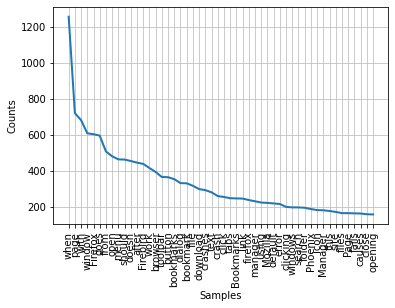

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [66]:
import matplotlib.pyplot as plt
frequency_dist.plot(50, cumulative=False)

In [68]:
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
import matplotlib.pyplot as plt

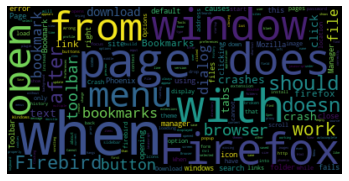

In [70]:
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
# 불용어 제거
from nltk.corpus import stopwords
sw_l = stopwords.words('english')

In [73]:
webtext_words_without_sw = [word for word in webtext_words if word not in sw_l]

In [74]:
'when' in webtext_words_without_sw

False

In [77]:
frequency_dist = nltk.FreqDist(webtext_words_without_sw)

large_words = dict([
    (k,v) for k,v in frequency_dist.items() if len(k) > 3
])

frequency_dist = nltk.FreqDist(webtext_words_without_sw)

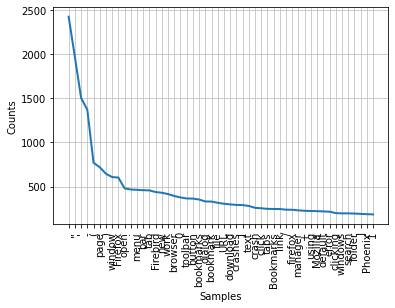

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [78]:
frequency_dist.plot(50, cumulative=False)

In [80]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

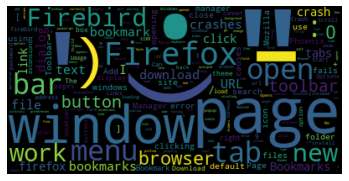

In [82]:
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()